In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd

import sys
sys.path.append('./RunAnova')

from RunAnova import OneWayAnova

In [2]:
resp_var = 'attention_span'
treatments = "meal_quantity"
experiment = {'No breakfast' : [8,7,9,13,10],
             'Light breakfast' : [14,16,12,17,11], 
             'Full breakfast' : [10,12,16,15,12]}

exp_df = pd.DataFrame(experiment)
exp_df.index.name = "observation"
exp_df

,No breakfast,Light breakfast,Full breakfast
observation,,,
0,8,14,10
1,7,16,12
2,9,12,16
3,13,17,15
4,10,11,12


For a level of confidence of 0.95


,Treatment,Mean,Std error,CI
0,No breakfast,9.4,1.03,"[6.54, 12.26]"
2,Full breakfast,13,1.1,"[9.96, 16.04]"
1,Light breakfast,14,1.14,"[10.83, 17.17]"


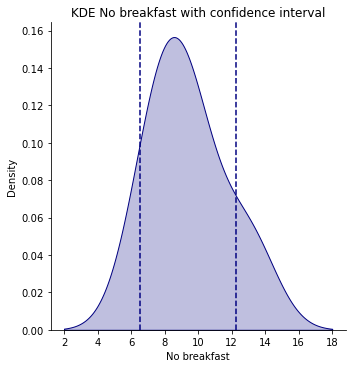

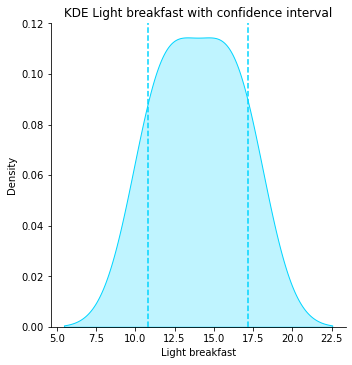

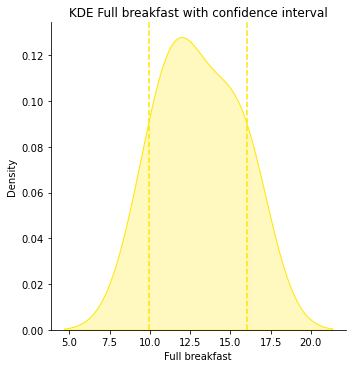

In [19]:
anov = OneWayAnova(df=exp_df, resp_var=resp_var , treatments=treatments)

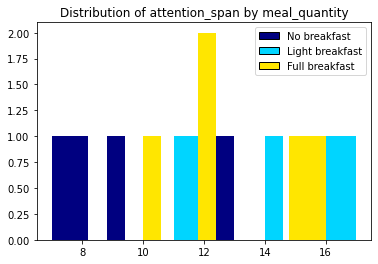

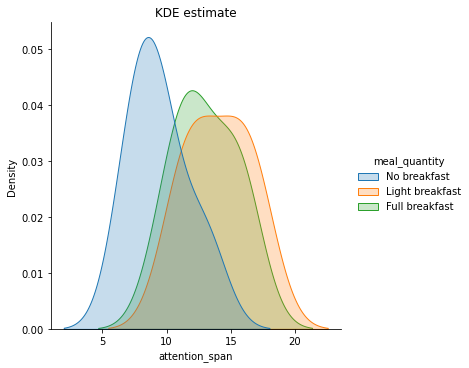

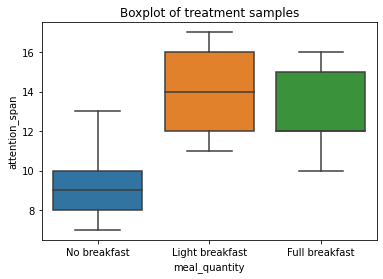

In [24]:
anov.show_distribution()

###### Run Qqplot test ###### 



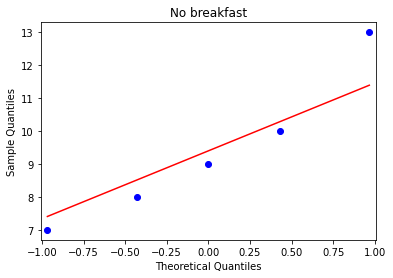

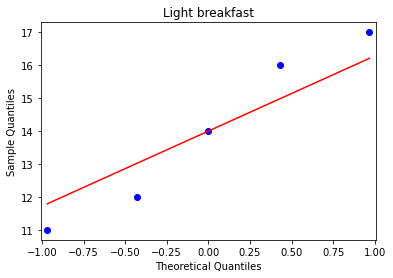

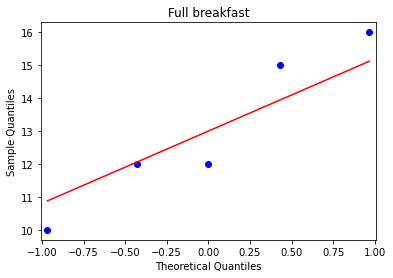

###### Run Shapiro test ###### 

If p > 0.05 we fail to reject null hypoteshsi -> Gaussian
No breakfast statistics=0.943, p=0.685
Light breakfast statistics=0.944, p=0.692
Full breakfast statistics=0.925, p=0.563
###### Run Levene test ###### 

If p-value >0.05 non-statistically significant difference in their varability
statistics=0.086, p=0.918


In [22]:
anov.normality_test(test_type="qqplot")
anov.normality_test(test_type="shapiro")
anov.normality_test(test_type="levene")


In [23]:
anov.run_anova(simple=False)

##### Decomposition of variance #####
Grand Mean 12.13
SST: 58.53, dof k-1:  2, MST: 29.27
SSE: 58.53, dof n-k:  12, MSE: 5.93
TSS=SST+SSE total variation: 129.73, DOF: 14
##### Testing #####
Test statistic: F=MST/MSE=4.93
F_alpha: 3.89 for a level of confidence of 0.05
We reject Ho!
We failed to reject Ho: one mean is different from the others!
P-value: 0.0273
eta squared: 0.45 omega_squared: 58.45
